# Case study- Hybrid of ANN and SOM

In [ ]:
# To predict the probability of each customer cheating

Defaulting to user installation because normal site-packages is not writeable


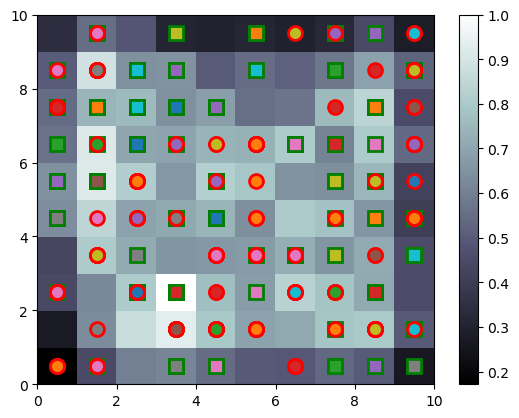

In [1]:
# Part 1- Identify frauds with self-organizing maps

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv(r'C:\Users\Krishi Thiruppathi\Desktop\Credit_Card_Applications.csv')
# dataset encoded to protect confidentiality

X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

#Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
X=sc.fit_transform(X)

!pip install minisom
#Training a SOM-has no implementation on scikit learn
from minisom import MiniSom
som=MiniSom(x=10,y=10,input_len=15,sigma=1.0,learning_rate=0.5) # x & y indicate 10x10 grid,sigma is the radius of neighbourhood
som.random_weights_init(X) #initialize random weights in the beginning
som.train_random(data=X, num_iteration=100)

# Visualizing the results-plotting the SOM
# Higher the MIT, more is the winning node an outlier inside the neighbourhood. Larger the MIT, larger to white the color will be
from pylab import bone, pcolor, colorbar, plot, show
# initialize window to contain map
bone()
# add MIT distances for all winning nodes of SOM
pcolor(som.distance_map().T) # distance_map will return all the MIT in one matrix
colorbar() # dark colors are winning nodes

#red circles- customers with no approval
#green squares- customers with approval
markers=['o','s'] # indicate shape
colors=['r','g']

#i for indices and x for vectors of customer, w-winning node
for i,x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5, # to place the marker at the centre of the winning node
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = None,
         markersize = 10,
         markeredgewidth = 2) # the class col decides the marker based on approval/not approval
show()

In [2]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(3,2)], mappings[(1,6)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [3]:
print('Fraud Customer IDs')
for i in frauds[:, 0]:
  print(int(i))

Fraud Customer IDs
15585892
15654859
15566495
15568878
15569394
15776156
15745804
15788224
15787229
15713160
15764922
15754578
15790113
15735330
15796413
15776921


In [7]:
# Part 2- Going from Unsupervised to Supervised Deep Learning

#Create matrix of features
customers =dataset.iloc[:,1:].values

#Creating the dependent variable
is_fraud = np.zeros(len(dataset))
#Looping all the customers and checking if the customer id matches the customer id in list of frauds. if so, marked as 1.
for i in range(len(dataset)):
    if dataset.iloc[i,0] in frauds:
        is_fraud[i] = 1

In [8]:
is_fraud

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [11]:
# ANN part

import tensorflow as tf

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
customers=sc.fit_transform(customers)

# initialize ann
ann= tf.keras.models.Sequential()

# add input and first hidden layer- input is the no. of unique cols specified in the dataset given
ann.add(tf.keras.layers.Dense(units=2,activation='relu',input_dim=15))

# add output layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

ann.compile(optimizer= 'adam' , loss= 'binary_crossentropy', metrics= 'accuracy' )

ann.fit(customers, is_fraud, batch_size=1, epochs=2)

Epoch 1/2
690/690 [==============================] - 1s 718us/step - loss: 0.5193 - accuracy: 0.7971
Epoch 2/2
690/690 [==============================] - 0s 685us/step - loss: 0.2927 - accuracy: 0.9609


In [13]:
# Predicting probabilities of frauds
y_pred = ann.predict(customers)
y_pred

22/22 [==============================] - 0s 777us/step


array([[1.12719089e-01],
       [9.18867290e-02],
       [2.57076807e-02],
       [2.71833897e-01],
       [2.98161715e-01],
       [2.98161715e-01],
       [1.78179249e-01],
       [7.91919380e-02],
       [3.95838469e-02],
       [5.79366423e-02],
       [3.42569470e-01],
       [2.98161715e-01],
       [4.04832214e-01],
       [3.15880388e-01],
       [7.19878599e-02],
       [2.56269388e-02],
       [2.98161715e-01],
       [2.98161715e-01],
       [6.46092072e-02],
       [2.98161715e-01],
       [1.47629157e-01],
       [1.94588434e-02],
       [9.63091776e-02],
       [7.55019784e-02],
       [1.36069968e-01],
       [3.41998488e-01],
       [7.84507245e-02],
       [2.98161715e-01],
       [2.41818830e-01],
       [3.04119617e-01],
       [2.98161715e-01],
       [2.69781277e-02],
       [2.85036629e-03],
       [2.98161715e-01],
       [1.28404379e-01],
       [6.22520922e-03],
       [6.90657785e-03],
       [1.09526828e-01],
       [3.23710516e-02],
       [7.06269220e-02],


In [14]:
# Adding customer id to y_pred
y_pred = np.concatenate((dataset.iloc[:,0:1].values,y_pred), axis = 1)

In [15]:
y_pred

array([[1.57761560e+07, 1.12719089e-01],
       [1.57395480e+07, 9.18867290e-02],
       [1.56628540e+07, 2.57076807e-02],
       ...,
       [1.56754500e+07, 5.11101596e-02],
       [1.57764940e+07, 1.78414539e-01],
       [1.55924120e+07, 2.98161715e-01]])

In [16]:
#Sort the customers by their predicted probability of cheating
y_pred = y_pred[y_pred[:,1].argsort()]

In [17]:
y_pred

array([[1.55941330e+07, 1.54681344e-04],
       [1.56389830e+07, 3.48678703e-04],
       [1.56461900e+07, 3.57250829e-04],
       ...,
       [1.56271900e+07, 4.61440414e-01],
       [1.56111890e+07, 4.93543774e-01],
       [1.56173480e+07, 5.59457779e-01]])